## Задача 2.2. Теорема запаздывания для преобразования Фурье

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
|     **E, В**    | 0.1 | 0.5 |   1  |   5  |  1  |   5  | 0.5 |  2.5 |   6  | 1.6 |   7  |   8  |
| **$\tau$, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |

Ниже приведен пример вычисления спектральной плотности для несимметричного прямоугольного импульса амплитудой $E=0.1$ В, длительностью $\tau=100$ мкс. В данном случае импульс начинается в начале отсчета оси времени. 

Для заданных параметров $E$ и $\tau$ из таблицы, построить и сравнить графики $\text{Re} X(f)$, $\text{Im} X(f)$, $|X(f)|$ для прямоугольного импульса, начинающегося в моменты времени $-\tau /2$ и $0$. Как согласуются результаты с теоремой запаздывания для преобразования Фурье?


In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

from my_lib import *

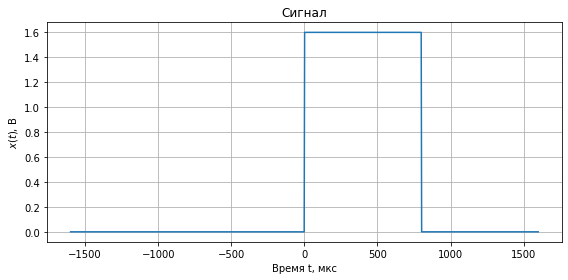

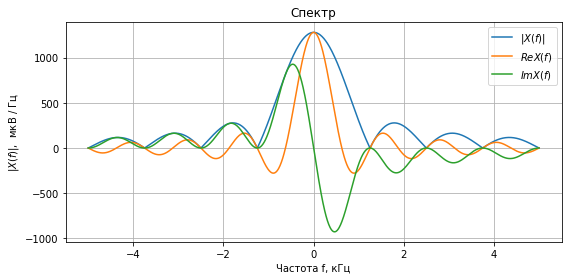

In [2]:
tau=800*1e-6 #800 мкс
E = 1.6 # 1.6 В -- амплитуда сигнала

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return E
    else:
        return 0.0 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

Спектральная плотность прямоугольного окна (без задержки):
$$X(f) = \tau \frac{\sin(\pi f \tau)}{\pi f \tau}$$

По теореме о задержке спектральная плотность прямоугольного окна с задержкой:
$$X_1(f) = \tau \frac{\sin(\pi f \tau)}{\pi f \tau} \cdot e^{-j 2 \pi f \tau}$$

или:
$$X_1(f) = \tau \frac{\sin(\pi f \tau)}{\pi f \tau} (\cos{2 \pi f \tau} - j \sin{2 \pi f \tau})$$


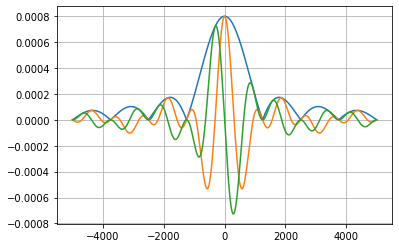

In [3]:
'''
Убедимся, что все теория совпадает с практикой
'''
X1 = tau * np.sin(np.pi * f_band * tau) / (np.pi * f_band * tau) * np.exp(-1j * 2*np.pi*f_band*tau)
plt.plot(f_band, abs(X1))
plt.plot(f_band, X1.real)
plt.plot(f_band, X1.imag)
plt.grid()